<a href="https://colab.research.google.com/github/snehathth/WWCodeDataScience/blob/master/Statistics%20and%20Data%20Science/7_Statistics_in_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WWC Data Science and Statistics - Week 7 - Unsupervised Learning

## Supervised Learning vs Unsupervised Learning

In supervised learning, a human predefines the grouping (or labelling) of the data. For example:
* images categorised as animals
* finacial data of an individual tagged as defaulted on credit or not.

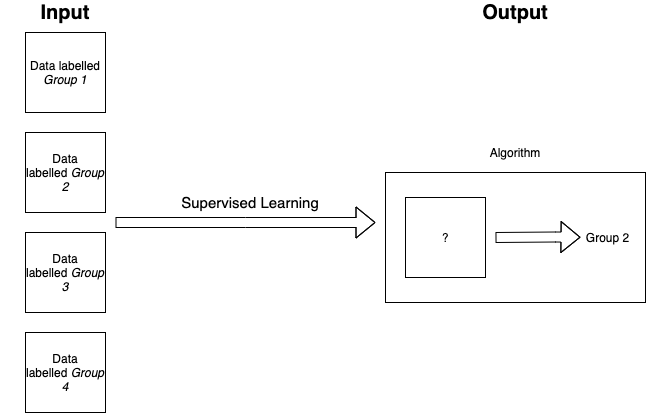

Whereas in unsupervised learning, the groups or labelled are not defined before the learning. Examples:
* grouping customers into segments
* finding abnormality in daily transactions.

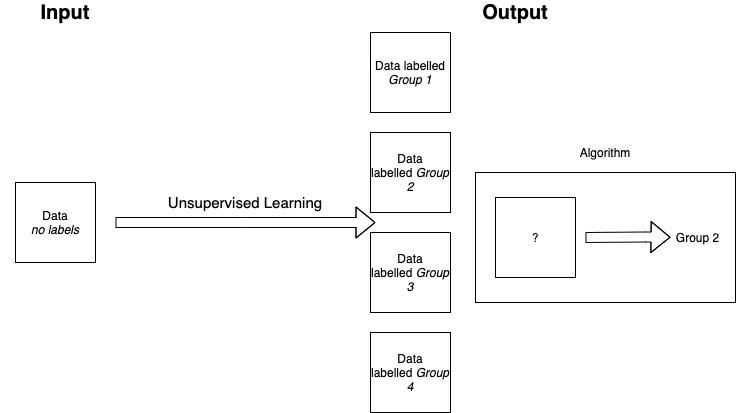

## More Detailed Background

### Machine Learning


There are three main sub-categories of machine learning (ML):

* Supervised Learning
* Unsupervised Learning
* Reinforcement Learning

In both supervised learning and reinforcement learning, the limits of the learning is defined by the human using or designing the algorithm (see [Deepmind](https://deepmind.com/blog/article/unsupervised-learning)). Supervised learning requires the algorithm to classify or predict within predefined groups or labels. Examples include deciding whether to give some a credit card or matching handwriting to known alphabets. Reinforcement learning uses rewards to maximise performance towards a specific goal. A famous example of reinforcement learning is AlphaGoZero learning to play Go. In unsupervised learning, the algorithm is unrestricted by the human user (or supervisor).

### Unsupervised Learning

Unsupervised Learning (or UL) is simply an algorithm which learns from untagged data. 


#### What is untagged data?

For supervised learning, the data fed into the algorithm often has “tags” or labels. Take the example of classifying images as a cat or a dog - both the images and the label are given to the algorithm which then learns how to classify new images as a cat or a dog. In unsupervised learning, the images would be fed into the algorithm without the label cat or dog, and the algorithm allowed to create its own tags. How useful this is depends on the problem we are trying to solve.

#### Unsupervised?

The unsupervised part means the user (or creator) does not “supervise” or direct the algorithm within their predefined limits. Instead the algorithm is free to discover its own patterns, this is particularly useful for finding unthought of patterns in the data. In the problem of defining images as cats or dogs, supervised learning is more suited as we want an defined output. However, if we had images of animals and we wanted to find similar characteristics between the animals, an unsupervised algorithm could group them together in unforeseen ways.

#### Advantages

* Tagging data (e.g. images) is time intensive and requires a lot of human resources. (This is why Google uses captcha to check if we are human, we are mass tagging images for them!)
* Interesting, not thought of patterns can emerge from the data as the algorithm is not restricted by the human supervisor.

#### Disadvantages

* There is not a guarantee that useful patterns will emerge.
* Harder to code and perform.

#### Use Cases

* Customer segmentation
* Anomaly detection
* Recommender systems

#### Types


* Neural Networks (but only specific, complex types)
* Probabilistic

This session will focus on probabilistic methods.

## Important Statistical Concepts in Python

Let's start by importing the libraries for statistics:

* Numpy
* Pandas
* Statistics

In [ ]:
import numpy as np
import pandas as pd
import statistics

We'll be using two CSV files - you can download the file [here](https://drive.google.com/drive/folders/1y7BlM3hXT1kWYAoj0CF3tYSNxqBoShrN)

(the data was taken from [here](http://homepages.inf.ed.ac.uk/imurray2/teaching/oranges_and_lemons/) and amended slightly):

* fruit.csv
* labels.csv

These can be found in the Github. Please upload them (by clicking the folder icon in the left hand panel, then the upload icon which looks like a piece of paper with an arrow).

Once uploaded, run the code below to read the fruit file using Pandas.

In [ ]:
fruit_data = pd.read_csv('fruit.csv',header=0)
fruit_data.head()

,type,weight,height,width
0,1,192,8.4,7.3
1,1,180,8.0,6.8
2,1,176,7.4,7.2
3,2,86,6.2,4.7
4,2,84,6.0,4.6


(Note: in the above data label is a tag. This is included for comparison after analysing and won't actually be included when performing unsupervised learning).

Now let's do the same for the labels file.

In [ ]:
fruit_labels = pd.read_csv('labels.csv', header=0)
fruit_labels.head()

,type,description,fruit
0,1,Granny smith apple,apple
1,2,Mandarin,orange
2,3,Braeburn apple,apple
3,4,Golden delicious apple,apple
4,5,Cripps Pink Washington USA apple,apple


In [ ]:
fruit_data.shape

(59, 4)

Pandas has a built in function *describe* which gives the basic descriptive statistics of the dataframe.

In [ ]:
fruit_data.describe()

,type,weight,height,width
count,59.000000,59.000000,59.000000,59.000000
mean,6.305085,163.118644,7.105085,7.693220
std,2.878303,55.018832,0.816938,1.361017
min,1.000000,76.000000,5.800000,4.000000
25%,4.000000,140.000000,6.600000,7.200000
50%,7.000000,158.000000,7.200000,7.600000
75%,9.000000,177.000000,7.500000,8.200000
max,10.000000,362.000000,9.600000,10.500000


Note: it is important to clean data before performing any statistics analysing or machine learning. This includes:
* removing null values
* examining outliers
Data cleaning, sorting and wrangling was already performed on these datasets.

But let's combine the two datasets, and make some variables to use later:

In [ ]:
combined = fruit_data.merge(fruit_labels, left_on='type', right_on='type')

original_fruit_label = combined["fruit"]

fruit_label = np.unique(original_fruit_label)

original_specific_label = combined["description"]

type_label = np.unique(original_specific_label)

### Measures of Central Tendency - Mean, Median, Mode

Measures of central tendency, or averages, are used to find the middle values of data. The most commonly used ones are mean, median and mode.

#### Mean

The arithmatic mean, often referred to as the average, is calculated as the sum of all values defined by the number of values ($n$):

$\bar{x} = \frac{1}{n} \sum_{i=0}^n x_{i} $

Often the mean is also referred to as $\mu$.

The mean of each variable can be computed in Python using the *statistics* package:

In [ ]:
statistics.mean(fruit_data["height"])

7.105084745762712

Or the mean of all variables can be calculated using *pandas*. As *fruit_data* is a pandas dataframe, there are some built in functions, including *mean()*:

In [ ]:
fruit_data.mean()

type        6.305085
weight    163.118644
height      7.105085
width       7.693220
dtype: float64

The individual variables means can accessed as follows:

In [ ]:
fruit_data.mean()["weight"]

163.11864406779662

#### Median


The median of a dataset can be thought of as the "middle" value. As such, it is calculated slightly differently when there are an even and odd number of data points in the dataset.

If $n$ is even:

$ median(X) = x_\frac{n+1}{2} $

If $n$ is odd:

$ median(X) = \frac{x_\frac{n}{2} + x_\frac{n+1}{2}}{2} $

Median can be computed similarly to mean, using *statistics* and *pandas*:

In [ ]:
statistics.median(fruit_data["height"])

7.2

In [ ]:
fruit_data.median()

type        7.0
weight    158.0
height      7.2
width       7.6
dtype: float64

#### Mode

The mode is the most common value in the dataset. It is useful for discrete and nomial data. It can calculated by finding the maximum of the frequency counts of each variable. It is computed similiarly to mean and median, with some caveats.

Let's look at height first (ignoring this being a continuous variable for now):

In [ ]:
statistics.mode(fruit_data["height"])

7.3

We get a value for height, now let's try for width (which will not work, try to understand the error message):

In [ ]:
# # Uncomment the line below to see the error message output
statistics.mode(fruit_data["width"])

StatisticsError: ignored

With the statitics package, the mode function only works if there is one unique modal value.

Pandas, on the other hand, will output multiple modal values:

In [ ]:
combined.mode()

,type,weight,height,width,description,fruit
0,8,116,7.3,7.1,Turkey Navel class 1 cal 6 orange,orange
1,10,154,NaN,7.5,lemons unknown type from local shop,NaN


Let's calculate for fruit only:

In [ ]:
combined['fruit'].mode()

0    orange
dtype: object

Now for description:

In [ ]:
combined['description'].mode()

0       Turkey Navel class 1 cal 6 orange
1     lemons unknown type from local shop
dtype: object

Let's just check that two mode groups is correct using the *value_counts()* function for pandas dataframes:

In [ ]:
combined['description'].value_counts()

 lemons unknown type from local shop    10
 Turkey Navel class 1 cal 6 orange      10
 Morrisons "selected seconds" orange     6
 Cripps Pink Washington USA apple        6
 Belsan Spanish lemons                   6
 Golden delicious apple                  5
 Mandarin                                5
 Braeburn apple                          5
 Lane Late Spanish jumbo orange          3
 Granny smith apple                      3
Name: description, dtype: int64

### Measures of Spread - Variance and Standard Deviation

Measures of spread calculate how squished or dispered the data is. They include variance, standard deviation and inter-quartile range.

#### Variance

Variance calculates how far away the data points are from the expected values, and is calculated as:

$ \sigma^2 =  \sum_{i=0}^n \frac{x_{i} - \mu}{n}  $

The larger the value, the bigger the spread.

Similarly, to the measures of spread, variance can be computed using *statistics* and *pandas*:

In [ ]:
statistics.variance(fruit_data["height"])

0.6673874926943307

In [ ]:
fruit_data.var()

type         8.284629
weight    3027.071888
height       0.667387
width        1.852367
dtype: float64

#### Standard Deviation

Standard deviation (sd) is the square root of the variance. So again, a small sd means the data is tight together and a large sd means the data is spread out.

$ \sigma = \sqrt{var(X)} $

### Normality

Normality is the concept of data being from a normal (or Gaussian) distribution. This distribution has a bell curve shape - with most of the data around the mean, tailing off towards the extremes. It is a common assumption in statistics, as large samples of random data tend to be normally distributed.

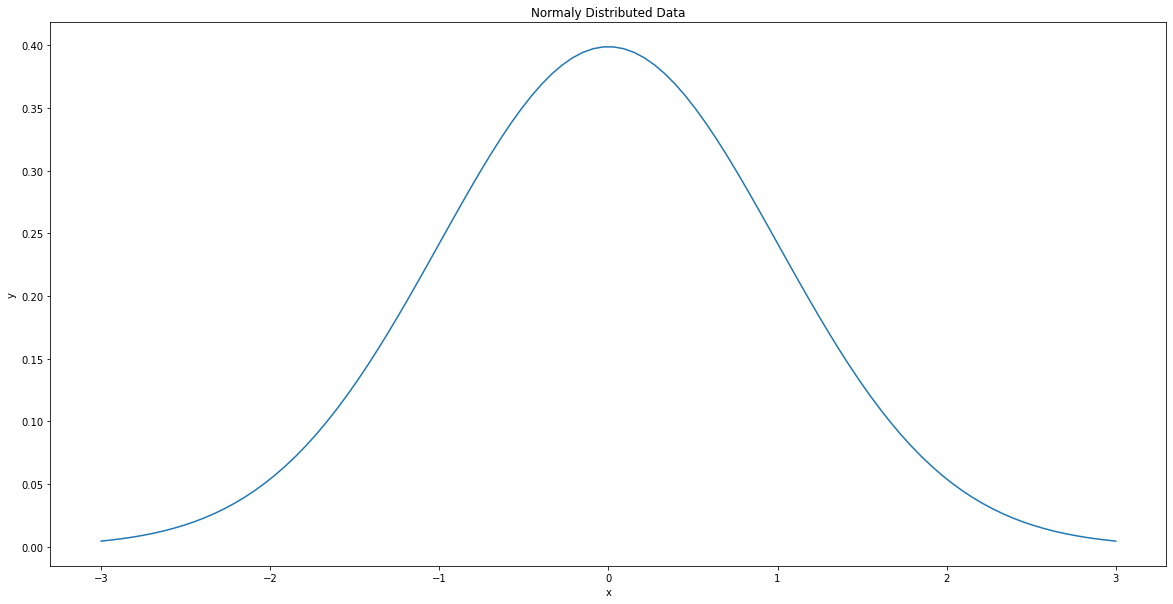

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

fig=plt.figure(figsize=(20,10))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Normaly Distributed Data')
plt.show()

Let's take a look at the height variable from the fruit data:

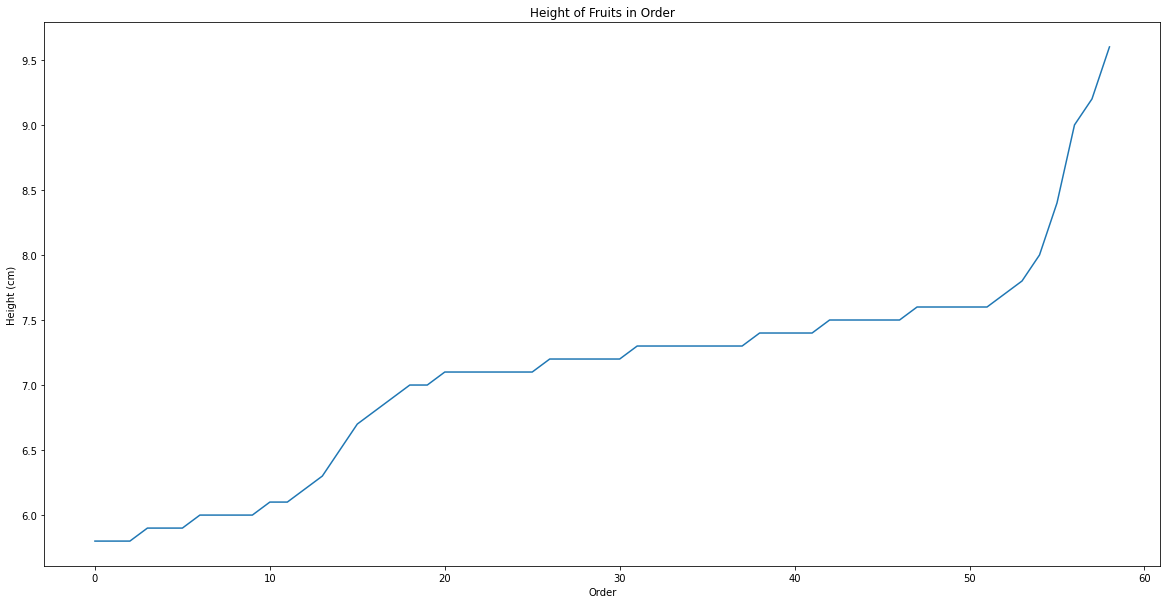

In [ ]:
height = fruit_data["height"]
height = height.sort_values(ascending=True)

fig=plt.figure(figsize=(20,10))
plt.plot(height.values)
plt.xlabel("Order")
plt.ylabel("Height (cm)")
plt.title("Height of Fruits in Order")
plt.show()

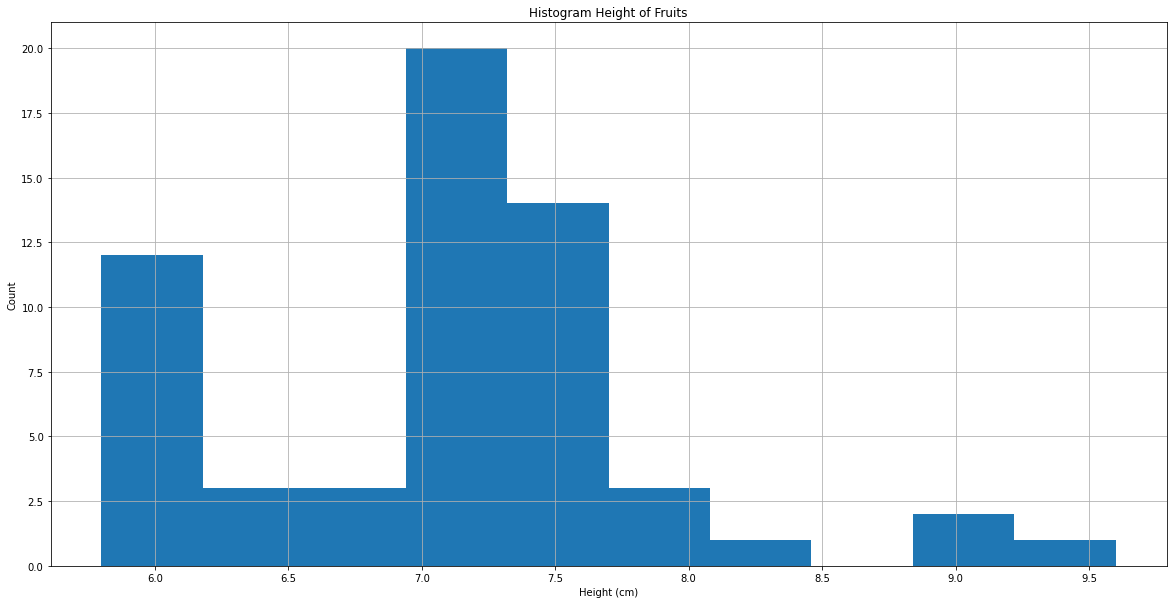

In [ ]:
fig=plt.figure(figsize=(20,10))
fruit_data["height"].hist()
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.title("Histogram Height of Fruits")
plt.show()

This graph does not show normality distributed data - there are more fruit with small heights than average or big heights. There are statisical methods which make be used to transform data to be normaly distributed.

### Standarisation and Normalisation

Standardisation and normalisation are methods of transforming data. Let's first make a dataset of just the features (height, width and weight).

In [ ]:
x = fruit_data[["height","width","weight"]]
print(x.head())

   height  width  weight
0     8.4    7.3     192
1     8.0    6.8     180
2     7.4    7.2     176
3     6.2    4.7      86
4     6.0    4.6      84


#### Normalisation

Normalisation transforms the data to be  $ [0,1]$ (or to have values between 0 and 1). The transformation is calculated using the minimum and maximum values in the dataset:

$x_{transform} = \frac{x - x_{min}}{x_{max} - x_{min}} $

In [ ]:
normalized_x = (x - x.min())/(x.max()-x.min())
print(normalized_x.head())

     height     width    weight
0  0.684211  0.507692  0.405594
1  0.578947  0.430769  0.363636
2  0.421053  0.492308  0.349650
3  0.105263  0.107692  0.034965
4  0.052632  0.092308  0.027972


#### Standardisation

Standardisation transforms the data to have $\mu = 0$ and $\sigma = 1$. The transformation is calculated using the mean and standard deviation of the dataset:

$x_{transform} = \frac{x - \mu}{\sigma} $

In [ ]:
standardized_x=(x-x.mean())/x.std()
print(standardized_x.head())

     height     width    weight
0  1.585084 -0.288917  0.524936
1  1.095451 -0.656289  0.306829
2  0.361001 -0.362391  0.234126
3 -1.107899 -2.199253 -1.401677
4 -1.352716 -2.272727 -1.438028


### Covariance

Often is is useful to know how two variables behave together. One way to calculate this is covariance - how much do two variables change together. Covariance between two variables $x,y$ is calculated using this formula:

$ cov_{x,y}=\frac{\sum(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1} $

### Linear Alegbra

Note: the following concepts are not strictly statistics, but are often used in statistics and machine learning calculations.

Machine Learning has a strong dependancy on a form of mathematics called *linear algebra*. The following concepts are foundations of linear algebra.

#### Matrices

Matrices are arrays of rows and columns - below is an example of a matrix with $m$ rows and $n$ columns.

$X =
 \begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{m,1} & x_{m,2} & \cdots & x_{m,n}
 \end{pmatrix}$

If $m = n$, the matrix is *square*.

 Matrices are a useful data format to sort values for mathimatical calculations. There are special rows for working with matrices (including matrix multiplication). Luckily, a lot of this is handled by modern statistical packages.

#### Covariance Matrix

Covariance is often calculated between two matrices. In this session, we will be calculating a covariance matrix for our features:

$cov(X) =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$

In [ ]:
cov_data = [[0,1,2,3],[2,3,4,5],[7,8,9,1]]

cov_matrix = np.cov(cov_data)
with np.printoptions(threshold=np.inf):
  print(cov_matrix)

[[ 1.66666667  1.66666667 -2.83333333]
 [ 1.66666667  1.66666667 -2.83333333]
 [-2.83333333 -2.83333333 12.91666667]]


#### Eigenvalues and Eigenvectors

Often we want to transform or rotate matrices in linear algebra. A useful way to do this is finding the eigenvalues and eigenvectors.

If we have a square matrix A, the eigenvalues $\lambda$ depict the size of the transformation and the eigenvectors $X$ depict the transformations. They are related by the following formula:

$AX = \lambda X$

## Plotting the Data

There are labels on the data we are working with - defining the fruit type and the specific fruit name. Let's plot the width and height of the fruits to understand the data better.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

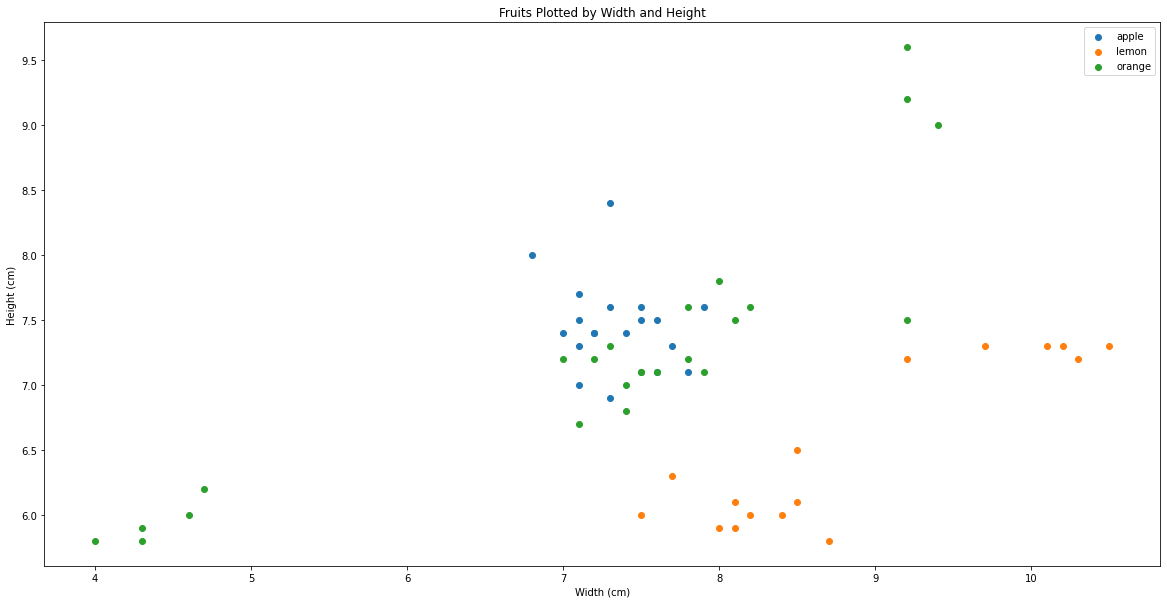

In [ ]:
fig=plt.figure(figsize=(20,10))
for i in fruit_label:
  plt.scatter(fruit_data[original_fruit_label == i]["width"] , fruit_data[original_fruit_label == i]["height"], label = i)

plt.legend()
plt.title("Fruits Plotted by Width and Height")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.show()

In supervised learning, we would build a classification model to understand what defines each of type of fruit - apples, lemons and oranges. Then we would use this model to define unknown fruit.

In unsupervised learning, we would let the model decide how to group the fruit.

There are actually three variables to define the fruit. Let's plot all three:

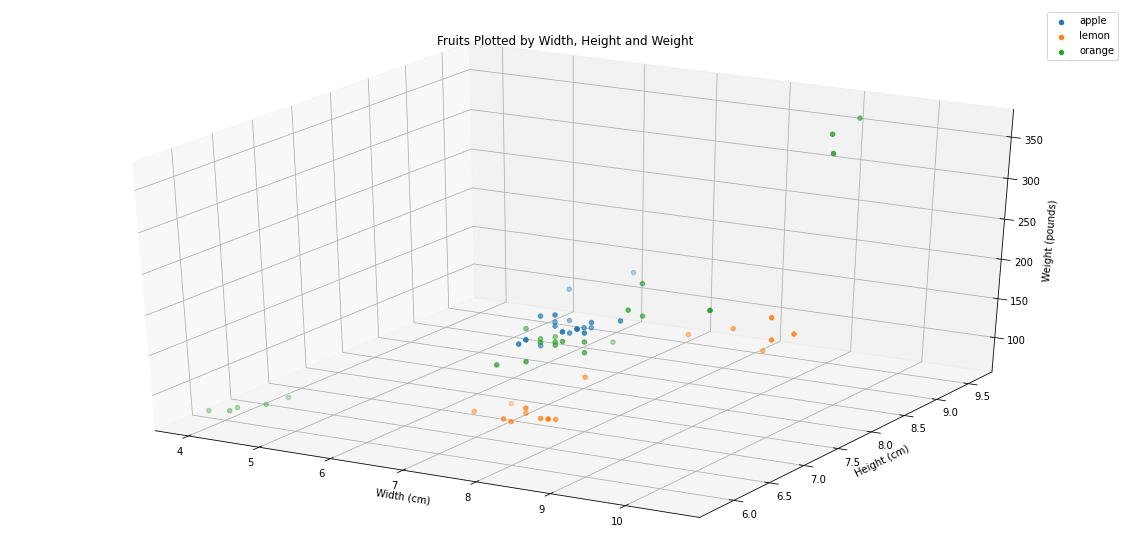

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

for i in fruit_label:
  ax.scatter(fruit_data[original_fruit_label == i]["width"] , fruit_data[original_fruit_label == i]["height"],fruit_data[original_fruit_label == i]["weight"],label=i)



ax.set_xlabel('Width (cm)')
ax.set_ylabel('Height (cm)')
ax.set_zlabel('Weight (pounds)')
plt.legend()
plt.title("Fruits Plotted by Width, Height and Weight")
plt.show()

While this may be more useful than simply plotting two variables (as it is useful to see oranges are both the lightest and heaviest in terms of weight), it is already getting complicated.

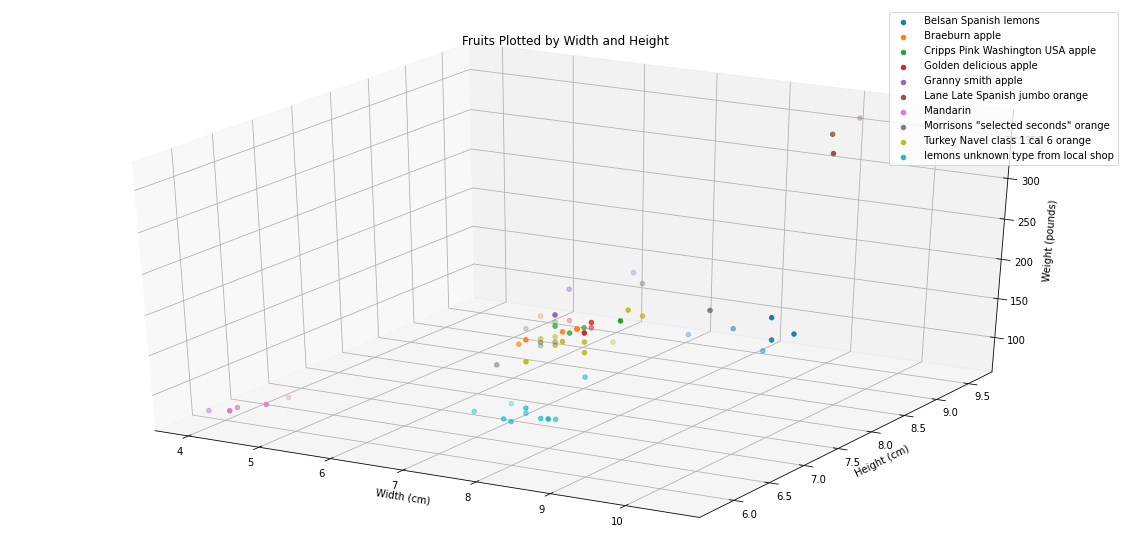

In [ ]:
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

for i in type_label:
  ax.scatter(fruit_data[original_specific_label == i]["width"] , fruit_data[original_specific_label == i]["height"],fruit_data[original_specific_label == i]["weight"],label=i)



ax.set_xlabel('Width (cm)')
ax.set_ylabel('Height (cm)')
ax.set_zlabel('Weight (pounds)')
plt.legend()
plt.title("Fruits Plotted by Width and Height")
plt.show()

For a lot of datasets there are more than three variables, making it extremely difficult to plot (and understand). The number of variables in the dataset (and therefore the model) is referred to as the **dimensionality of the data**. It is useful to try and minimise the number of variables included in the model (also known as **dimensionality reduction**). One method for this is **Principle Component Analysis** - one of the most popular unsupervised learning algoritms.

## Principle Coponent Analysis (PCA)

PCA is used to transform a set of variables (or features) into a new set of variables. This can be useful for datasets with a high number of variables, or ones with a lot of related variables (for example, in modelling children’s reading scores, household income and number of parents would be highly related variables which could be explaining the same issue and therefore it wouldn’t be useful to include both).

**Uses:**
* Dimensionality reduction
* Feature selection
* Speed up other ML algorithm
* Data visualisation
* Image compression / reconstruction


PCA rotates the variables given to a new set of variables. Such that if there were only two variables (x and y) the first new variable (or principle component) would be the line of best fit between the two variables.

PCA maintains the same number of variables as the original data. As much of the variance as possible is explained by the first principal component.

The amount the variables are rotated to form the principal components is denoted by an eigenvalue. The new weights for the original variables are represented by an eigenvector.

PCA is based on a lot of linear algebra. But uses variance and covariance from statistics.


Play around with [this applet](https://setosa.io/ev/principal-component-analysis/), to help visualise PCA.

### Method

1. Standardise the data.
2. Compute the covariance matrix.
3. Compute the eigenvalues and eigenvectors.
4. Rearrange eigenvectors.
5. Decide how many Principle Components to keep.

### Worked Example

Import standardisation and PCA packages from sklearn.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Standardised the data.

In [ ]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(x)

Perfrom PCA to create three components.

In [ ]:
pca = PCA(n_components=3)
pca.fit(transformed)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Check how much variance is explained by each principle component.

The following output means:
*  the first princple component explains 75.91% of the variance in the data
* the second explains 21.2%
* the third explains 2.9%.

These are the **eigenvalues**.

In [ ]:
print(pca.explained_variance_ratio_)
# print(pca.singular_values_)

[0.75914201 0.2120427  0.02881529]


There are many methods for choosing how many principle components to use.

1. Deciding before hand how much cumulative variance is to be explain
> For example, 80% which would be explained by the first two principle components.
2. Deciding a minimum variance to include
> For example, 5% which would exclude the third principle component.
3. Using the elbow method.
> This involves plotting the variance explained by each principle component, in reverse order of size. Plotting these will usually result in a bend, or elbow, and everything after the bend is excluded. See the following plot.

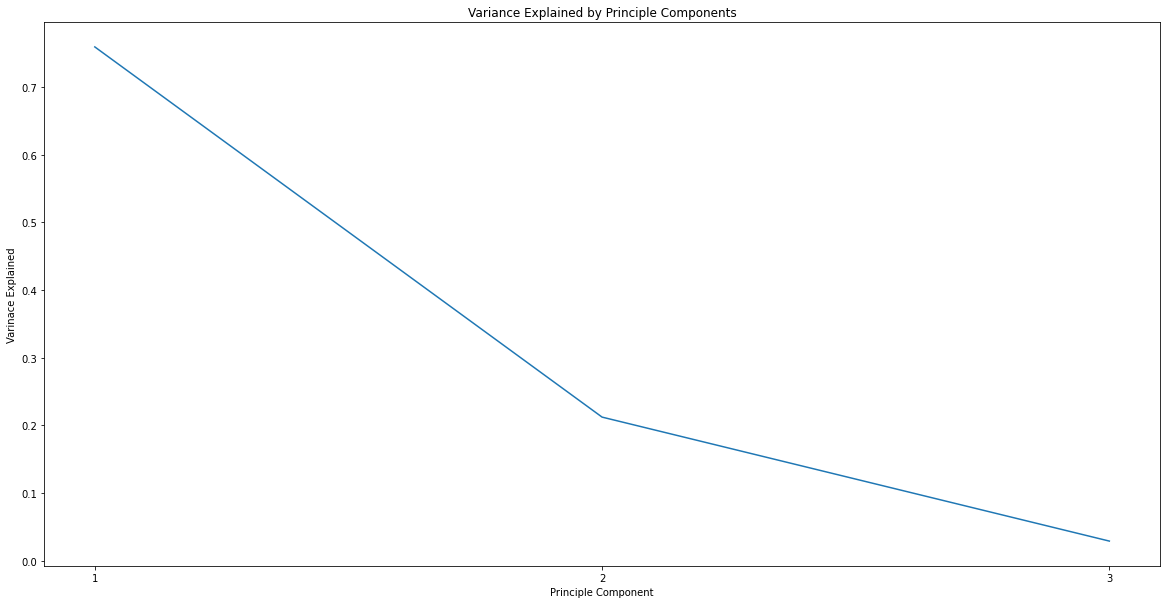

In [ ]:
xint = np.arange(1,len(pca.explained_variance_ratio_)+1)
fig=plt.figure(figsize=(20,10))
plt.xticks(xint)
plt.title("Variance Explained by Principle Components")
plt.xlabel("Principle Component")
plt.ylabel("Varinace Explained")
plt.plot(xint,pca.explained_variance_ratio_)

Print out the **eigenvectors** which shows the scalar values each variable is multiplied by for the respective principle component.

In the fruit example, we can see from the output below:

$PC1 = 0.59 * width + 0.48 * height + 0.64 * weight$

$PC2 = -0.51 * width + 0.84 * height - 1.67 * weight $

In [ ]:
pca.components_

array([[ 0.59198912,  0.48945211,  0.64030111],
       [-0.51488202,  0.84088723, -0.16674885],
       [-0.6200366 , -0.23096602,  0.74980618]])

Now we can apply these transforms to our original data.

In [ ]:
X_new = pca.transform(transformed)

It can be useful to plot the principle components for the new data.

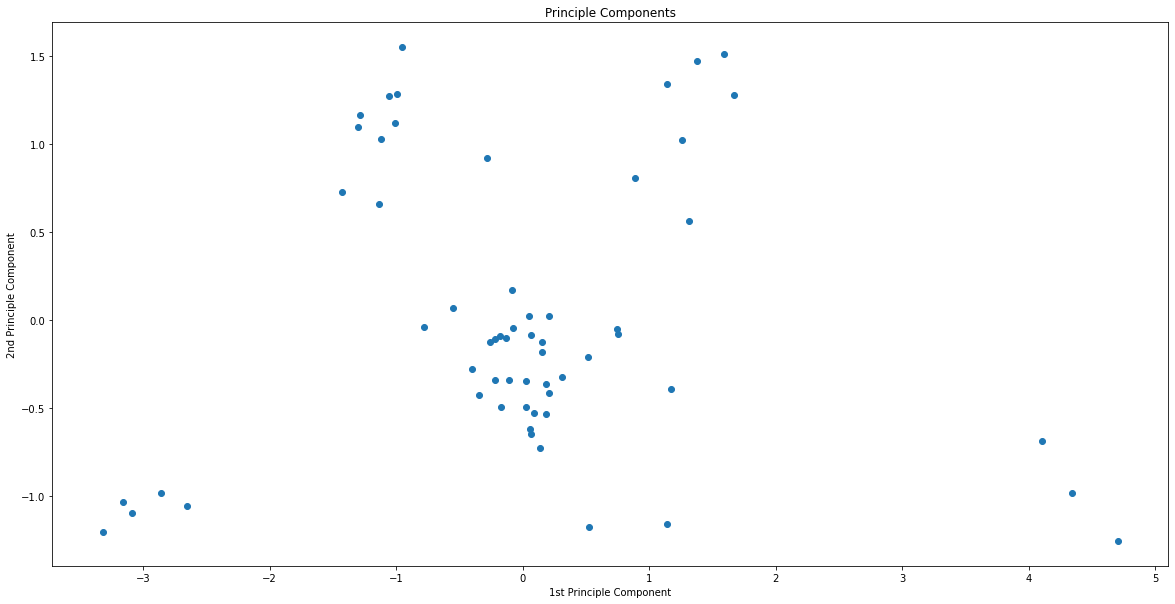

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.title("Principle Components")
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.scatter(X_new[:,0],X_new[:,1])

## Clustering

Clustering is grouping together data with similar features. Unlike classification, such as regression, the groups are not defined beforehand.

### k-Means Clustering

k-Means aims to split data into $k$ groups (or clusters) based on datapoints having the nearest mean.

The closest centroid (or mean) is calculated using the squared Euclidean distance. For two points, x and y, the squared Euclidean distance is calculated as :

$ d^{2}(x,y)=(x_{1}-y_{1})^{2}+(x_{2}-y_{2})^{2}+\cdots +(x_{i}-y_{i})^{2}+\cdots +(x_{n}-y_{n})^{2}$

Where $x_{i}$ and $y_{i}$ correspond the the variables in the dataset.

**Uses:**
* Bot detection.
* Behavioural segementation.

#### Method

1. Decide how many clusters - $k$.
2. Randomly select $k$ points as the centroids of the clusters.
3. All points are assigned to their closed cluster, based on centroid.
4. The clusters and centroids are recomputed.
5. Repeat 3 and 4 until stopping criteria met.

> Stopping criteria for K-Means
> 1. Centroids do not change.
> 2. Alll points remain in the same cluster.
> 3. A predefined max number of iterations have been performed.

#### Worked Example (Fruit Data)

##### Preparing the Data

Let's prep the data by taking only height and width.

In [ ]:
data = fruit_data[["height","width"]]
original_labels = fruit_data["type"]

In [ ]:
(n_samples, n_features), n_digits = data.shape, np.unique(fruit_labels["type"]).size

print(
    f"# fruit: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# fruit: 10; # samples: 59; # features 2


##### 10 Clusters

Sklearn have a package for KMeans, we need to specific how many clusters. Let's start with 10 (the number of different specific types of fruit).

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Apply the KMeans labels for each of our datapoints:

In [ ]:
labels = kmeans.predict(data)

Save the centroids of each cluster.

In [ ]:
centroids = kmeans.cluster_centers_

Plot the datapoints with their label, and the centroid of each cluster.

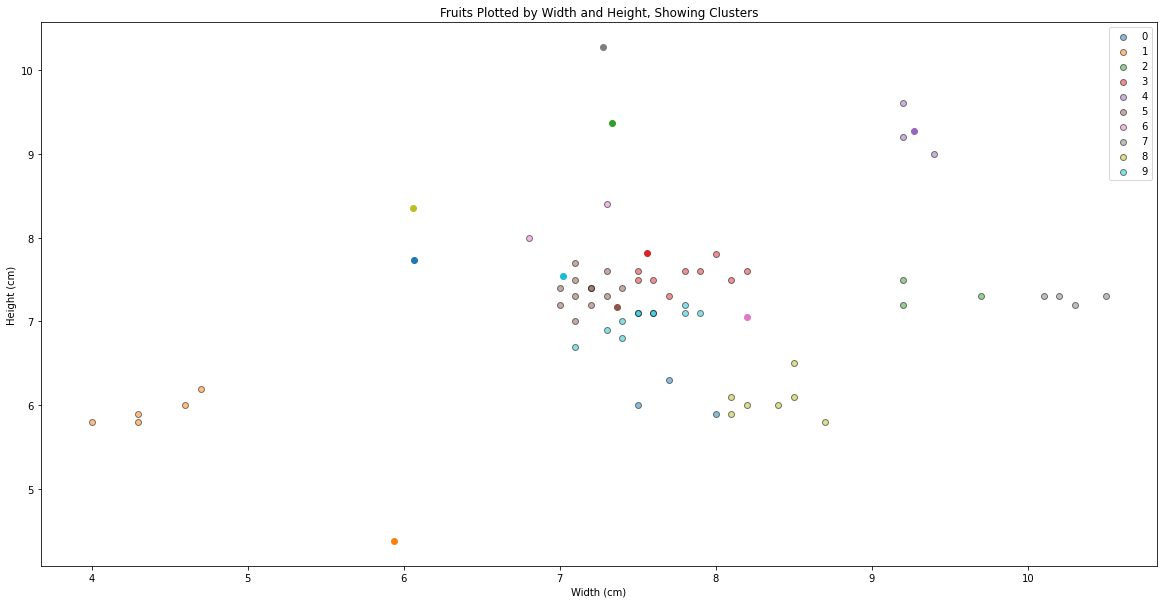

In [ ]:
plt.figure(figsize=(20,10))
# Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(data[labels == i]["width"] , data[labels == i]["height"], label = i,alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid)
plt.legend()
plt.title("Fruits Plotted by Width and Height, Showing Clusters")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.show()

Let's plot the original labels again just to compare.

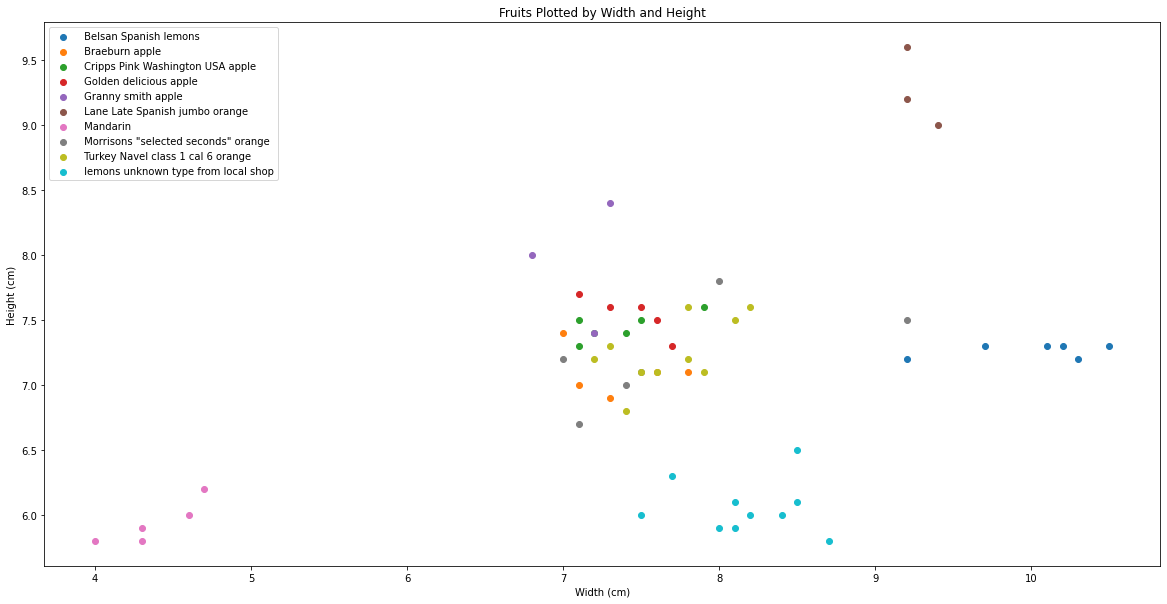

In [ ]:
plt.figure(figsize=(20,10))
combined = fruit_data.merge(fruit_labels, left_on='type', right_on='type')

original_fruit_label = combined["description"]

fruit_label = np.unique(original_fruit_label)
for i in fruit_label:
  plt.scatter(data[original_fruit_label == i]["width"] , data[original_fruit_label == i]["height"], label = i)
plt.title("Fruits Plotted by Width and Height")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend()
plt.show()

##### Comparing to original labels

There are multiple ways to compare the KMeans labels and the real labels.

1. Plotting

Text(0, 0.5, 'KMeans Labels')

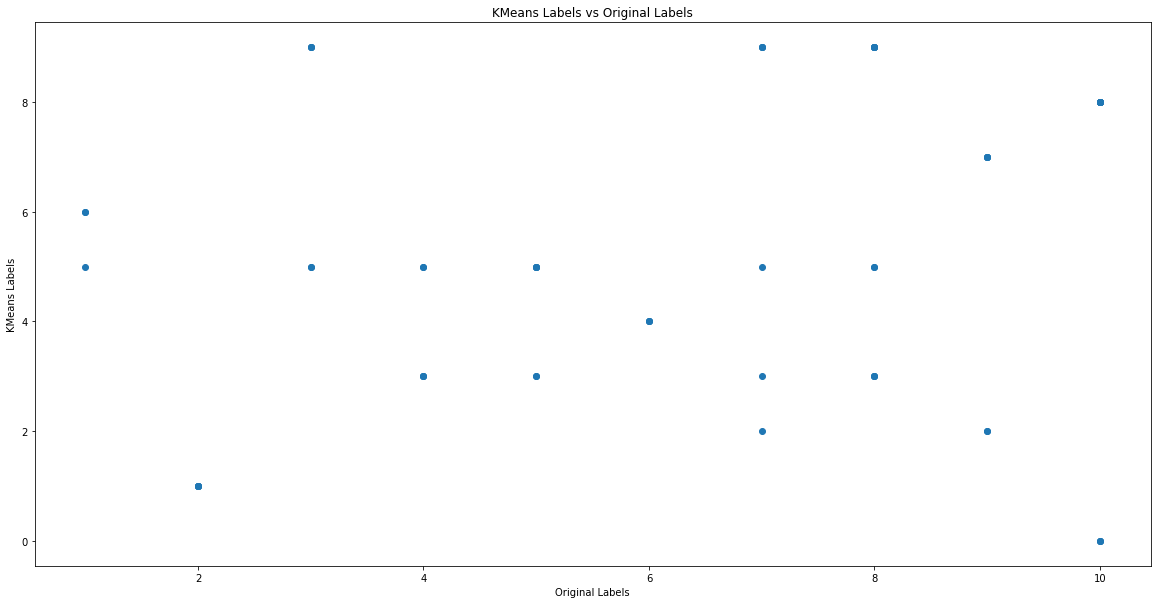

In [ ]:
label_array = np.array(labels)

plt.figure(figsize=(20,10))
plt.scatter(original_labels, label_array)
plt.title("KMeans Labels vs Original Labels")
plt.xlabel("Original Labels")
plt.ylabel("KMeans Labels")

As our labels are nominal, not ordinal (ordered), this isn't necessarily easy to interpret.

2. Crosstabs

In [ ]:
pd.crosstab(original_labels, label_array)

col_0,0,1,2,3,4,5,6,7,8,9
type,,,,,,,,,,
1,0,0,0,0,0,1,2,0,0,0
2,0,5,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,3
4,0,0,0,3,0,2,0,0,0,0
5,0,0,0,2,0,4,0,0,0,0
6,0,0,0,0,3,0,0,0,0,0
7,0,0,1,1,0,1,0,0,0,3
8,0,0,0,3,0,2,0,0,0,5
9,0,0,2,0,0,0,0,4,0,0


In the above output, look to see if any original labels and KMeans labels match up. (If you don't understand - label 2 seems to match col_1).

##### 3 Clusters

Now let's repeat for three clusters, for the types of fruit.

In [ ]:
kmeans_fruit = KMeans(n_clusters=3)
kmeans_fruit.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels_fruit = kmeans_fruit.predict(data)
centroids_fruit = kmeans_fruit.cluster_centers_

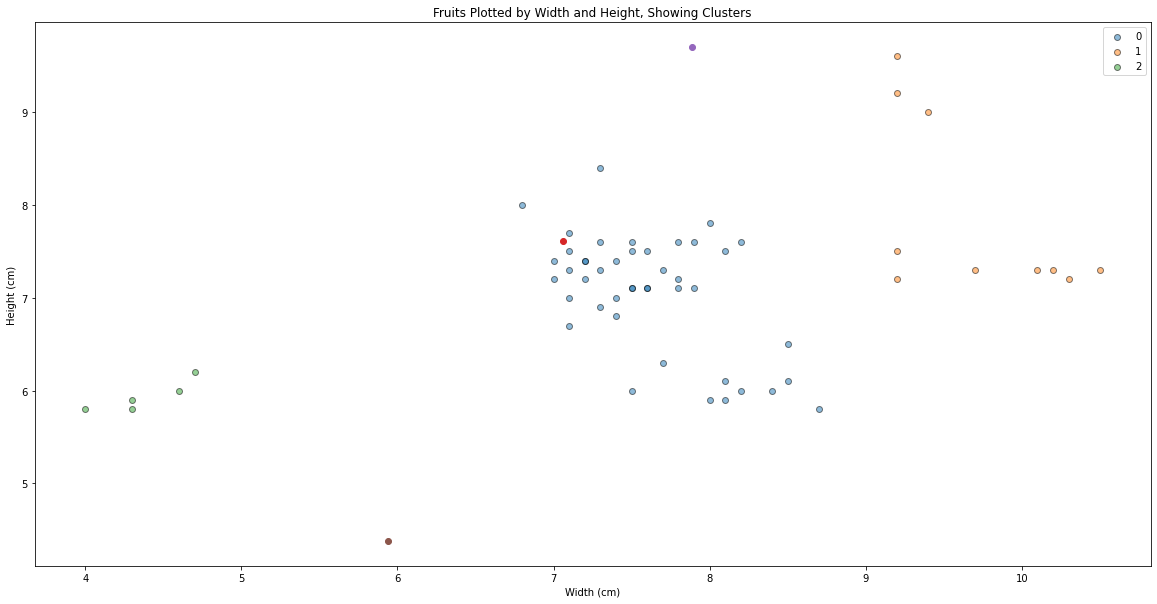

In [ ]:
#Getting unique labels
u_labels = np.unique(labels_fruit)
 
#plotting the results:
plt.figure(figsize=(20,10)) 
for i in u_labels:
    plt.scatter(data[labels_fruit == i]["width"] , data[labels_fruit == i]["height"], label = i,alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids_fruit):
    plt.scatter(*centroid)
plt.title("Fruits Plotted by Width and Height, Showing Clusters")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend()
plt.show()

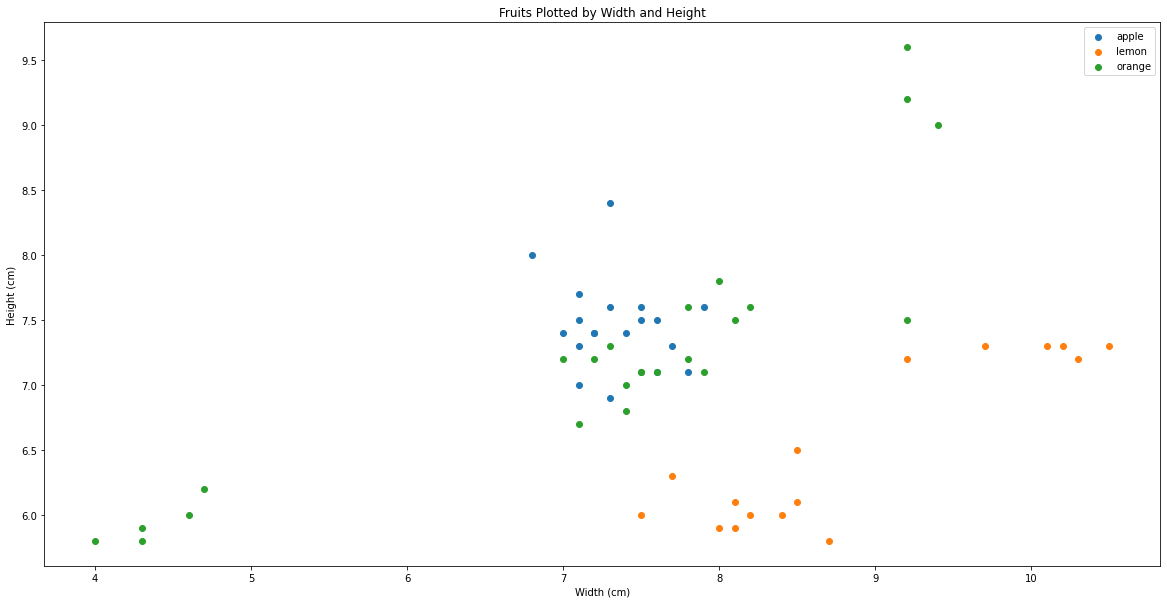

In [ ]:
combined = fruit_data.merge(fruit_labels, left_on='type', right_on='type')

original_fruit_label = combined["fruit"]

fruit_label = np.unique(original_fruit_label)

plt.figure(figsize=(20,10))
for i in fruit_label:
  plt.scatter(data[original_fruit_label == i]["width"] , data[original_fruit_label == i]["height"], label = i)
plt.title("Fruits Plotted by Width and Height")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend()
plt.show()

#### Task

Can you rerun the k-means analysis using all three variables?
* For both k = 3 and k = 10
* Compare this to the original data.

#### K-Median and K-Modal Clustering

The clustering algorithm can use one of the other measures of centrality.

It is best to use median if the data has extremes, as the median is less impacted by extremes.

For grouped data, the mode can be used (although this is more complicated to compute than the others).

#### How to decide k?

##### 1. Elbow method 


Using the elbow method as defined in PCA, but with the *Within-Cluster-Sum of Squared Errors* rather than the variance explained on the y-axis. This calculated how much the data points within clusters vary for each possible value of k and is calculated as 

$ WSS = \sum_{k=0}^K \sum_{i \epsilon S_{k}} \sum_{j=1}^p (x_{ij} - \bar{x_{kj}})^2  $

where 

$ S_{k}$ is all the data points in the kth cluster

$x_{ij}$ is an observation

$\bar{x_{kj}}$ is the centroid of the kth cluster


In [ ]:
sse = []
k_iter = np.arange(1,21)
i_iter = np.arange(len(data))
for k in k_iter:
    kmeans = KMeans(n_clusters = k).fit(data)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(data)
    curr_sse = 0

    for i in i_iter:
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (data["width"][i] - curr_center[0]) ** 2 + (data["height"][i] - curr_center[1]) ** 2

    sse.append(curr_sse)

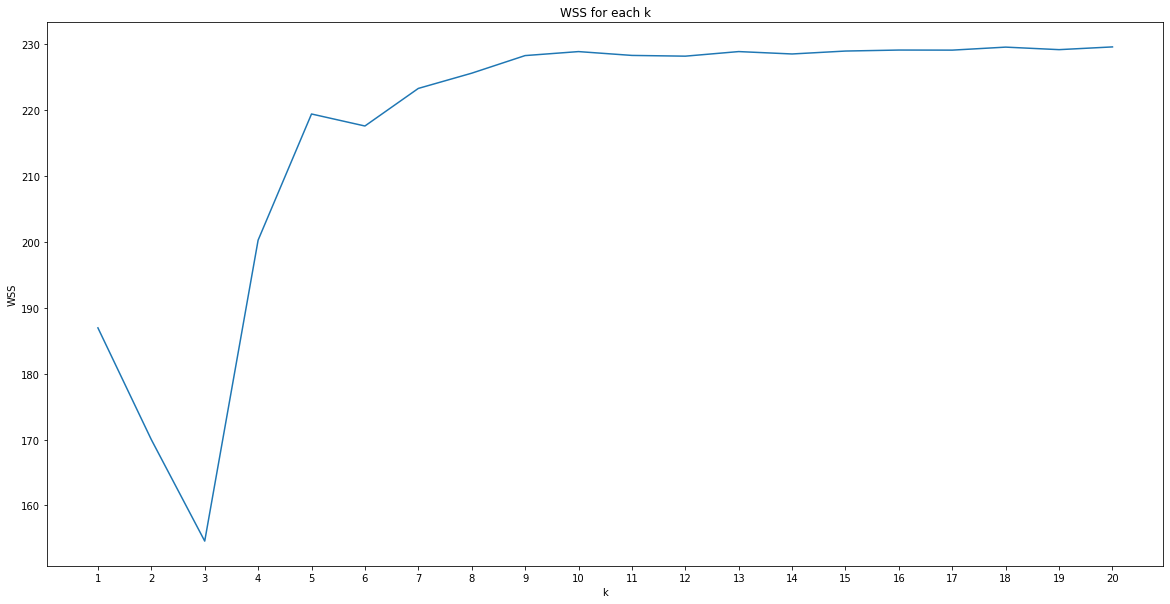

In [ ]:
plt.figure(figsize=(20,10))
xint = np.arange(1,len(sse)+1)

plt.xticks(xint)
plt.title("WSS for each k")
plt.xlabel("k")
plt.ylabel("WSS")
plt.plot(xint,sse)

3 clusters has the lowest WSS and is therefore optimum. Which is interesting as there are 3 fruit types in this data set.

##### 2. Silhouette Method



This is similar but calculates similarity between clusters and the dissimilarity between clusters.

$ s(i) = \frac{b(i)-a(i)}{max(a(i),b(i))}, if |C_{i}| > 1$

$ s(i) = 0, if |C_{i}| = 1 $

where

$ a(i) $ is the measure of similarity of i within its cluster and $b(i)$ is the dissimilar of i from other clusters. Both are calculated using the *Euclidean Distance*.

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20
k_iter = np.arange(2,kmax)
for k in k_iter:
  kmeans = KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

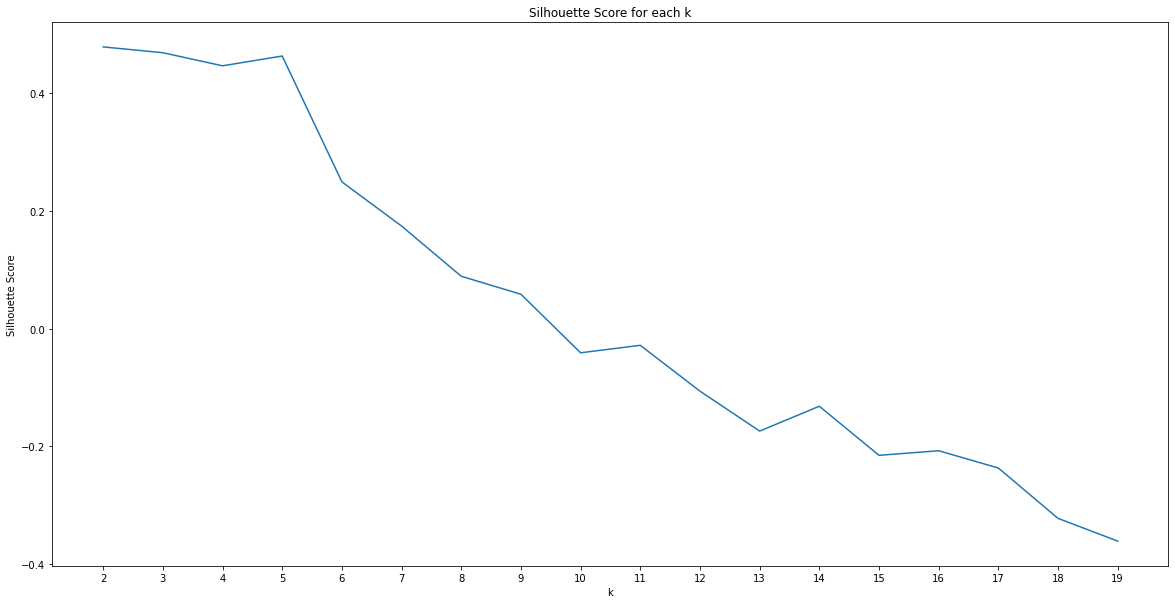

In [ ]:
plt.figure(figsize=(20,10))
xint = np.arange(2,len(sil)+2)

plt.xticks(xint)
plt.title("Silhouette Score for each k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.plot(xint,sil)

### Hierarchical Clustering

Hierarchical clustering is another method for splitting data into groups. Unlike k-means, the number of groups does not have to be specified before. A diagram, called a dendrogram, is also created which shows how similar (or dissimilar) the groups are.

Two methods of hierarchical clustering
1. Agglomerative clustering - bottom up
2. Divisive hierarchical clustering - top down

#### Agglomerative clustering - Method

1. Each data point is its own cluster - there are N clusters.
2. The two closest datapoints form a cluster - there are N-1 clusters.
3. The two closest clusters merge together to form a cluster - there are N-2 clusters.
4. Repeat steps 2 and 3 until there is 1 cluster of all the datapoints.


Let's look at an example of Agglomerative. Below we have some shapes which we are going to cluster together based on how close together them are.

N clusters:

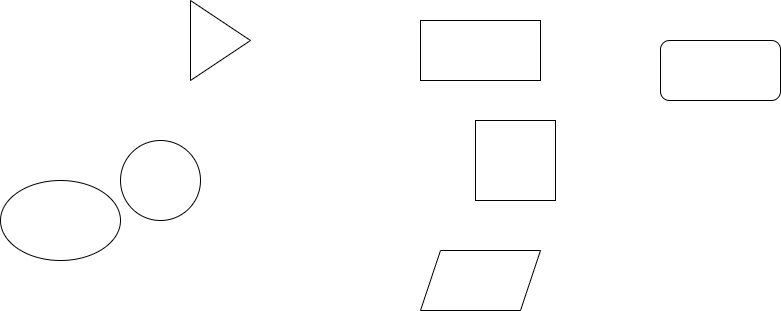



Two closest shapes are clustered together - N-1 clusters:

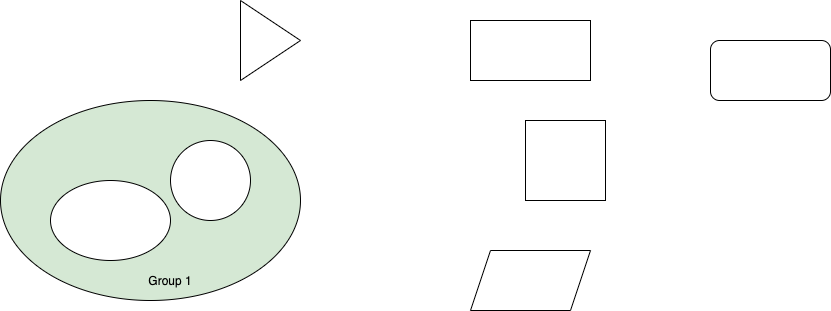



Two clusters are clusters together - N-2 clusters:

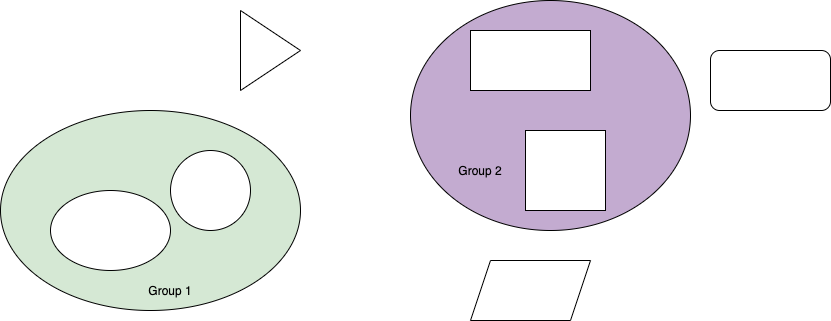



Repeat until all datapoints are in 1 cluster:

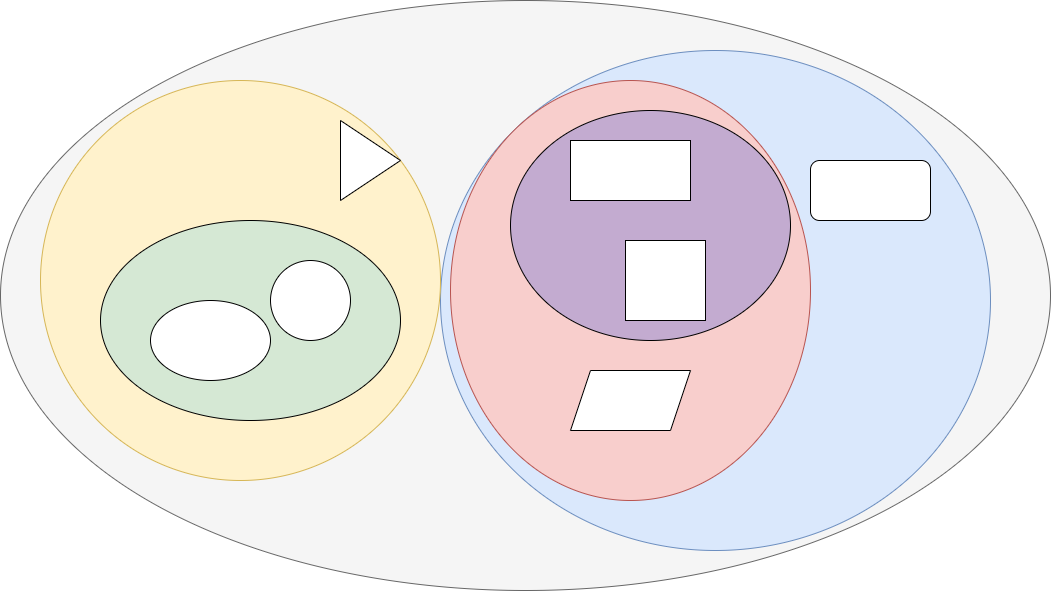


When calculating the distance between two clusters. Therefore, we need to decide on a distance measure and distance function before we start.

**Distance Measure**

$d(x_{i},x_{j})$ - sometimes known as a similarity measure. This gives us a value for the distance between two points. In k-Means, we used the squared Euclidean distance. Often in hierarchical clustering, the eucliden distance is used.

**Distance Function**

$D(C_{i},C_{j})$ - which we are trying to minimise when joining clusters together. Commonly used distance functions in hierarchical clustering:
* single-linkage
* complete-linkage
* average-linkage
* centroid-linkage

In this example, the *single-linkage* method has been used, which calculates the distance between the closest points in each cluster.

**Dendrogram**

The above example would create the following dendrogram:

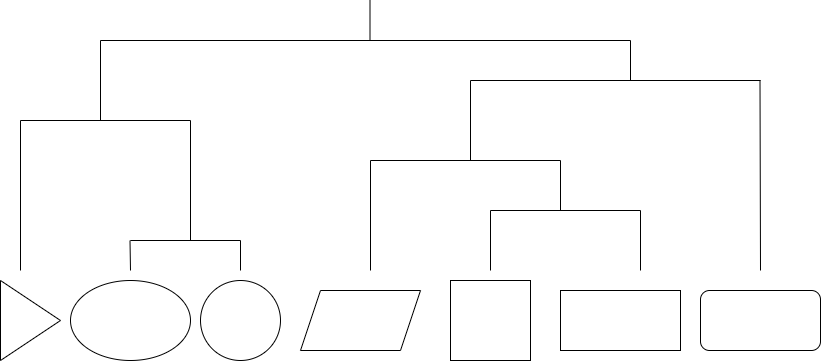

The distance between the vertical lines represents the dissimilarity between the data points and clusters.

#### Worked Example (Fruit Data)

In [ ]:
import scipy.cluster.hierarchy as sch

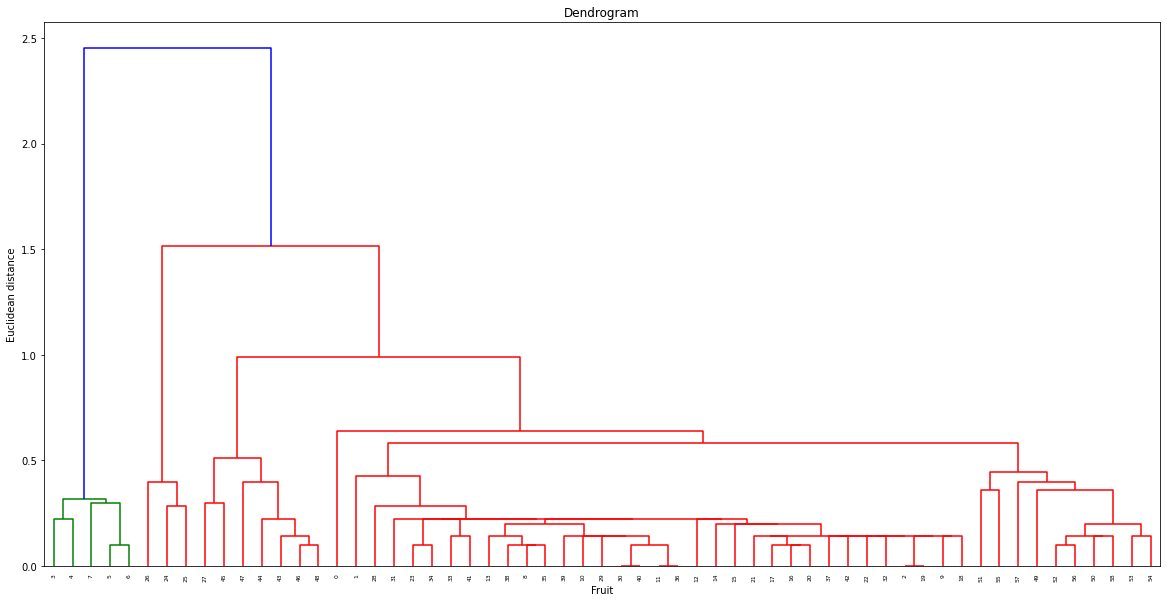

In [ ]:
plt.figure(figsize=(20,10))
dendrogrm = sch.dendrogram(sch.linkage(data, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Fruit')
plt.ylabel('Euclidean distance')
plt.show()

Notice how many clusters there are? To decide how many clusters to keep we use a method similar to the elbow method from the PCA method. 

To decide how many clusters to keep, we set a threshold and draw a horizontal line across. Where this intersects with the vertical lines are the clusters to keep.

For example, if we set the threshold value as 2, we would keep two clusters. If we set the threshold at 1, we would keep 4 clusters.

Generally, we aim for the threshold value to intersect the tallest vertical line.

#### Task

Change the *method* in the previous code block and rerun to see the difference this has (hint: see [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) for the options).

#### Divisive Hierarchical Clustering

Divisive Hierarchical Clustering is a top-down clustering method. We start with all the data points in the one cluster, and split a cluster in two, until each data point is in its own cluster.

### Model Based Clustering

There are some limitations of the previous clustering methods discussed including:
1. Without a model defining the data points, we cannot claim that any future data points will definitely fit into one of the clusters.
2. They do not handle frequently repeated data points well.

To overcome these, we can used model based clustering. One such method (used for clustering continuous data) is *Gaussian Mixture Model* or GMM. This method comes with 3 general assumptions:

1. We know the number of clusters beforehand.
2. Each data point has a certain probability of belonging to each cluster.
3. The data points are normally distributed.

#### Worked Example (Fruit Data)

##### 3 Clusters

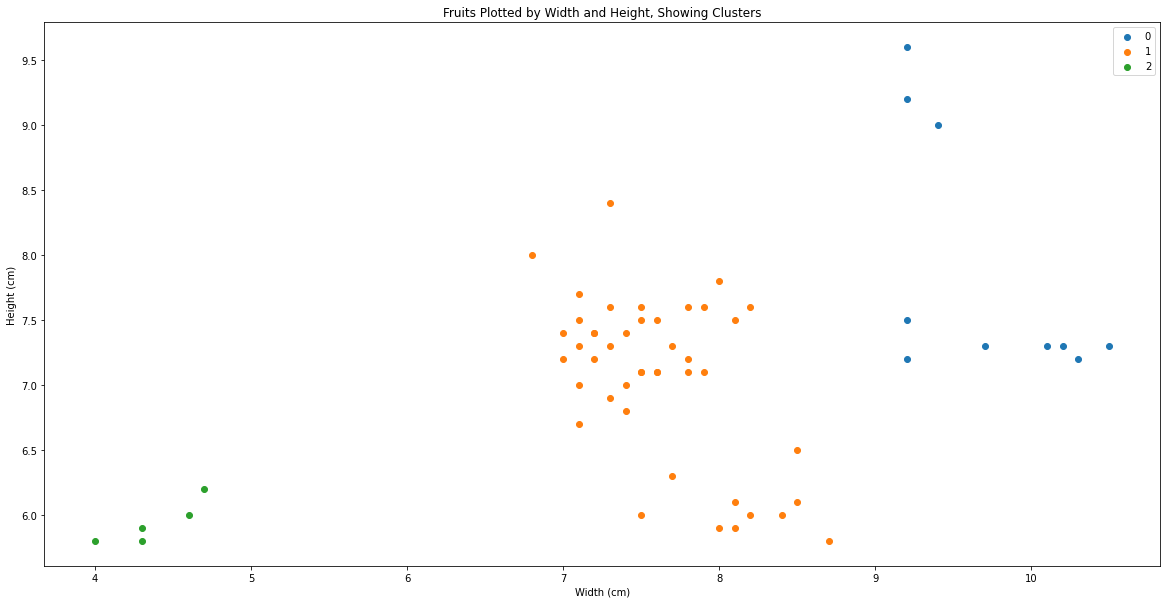

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(data)
gmm_labels = gmm.predict(data)

u_labels = np.unique(gmm_labels)
 
#plotting the results:
plt.figure(figsize=(20,10)) 
for i in u_labels:
    plt.scatter(data[gmm_labels == i]["width"] , data[gmm_labels == i]["height"], label = i)

plt.title("Fruits Plotted by Width and Height, Showing Clusters")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend()
plt.show()

##### 10 Clusters

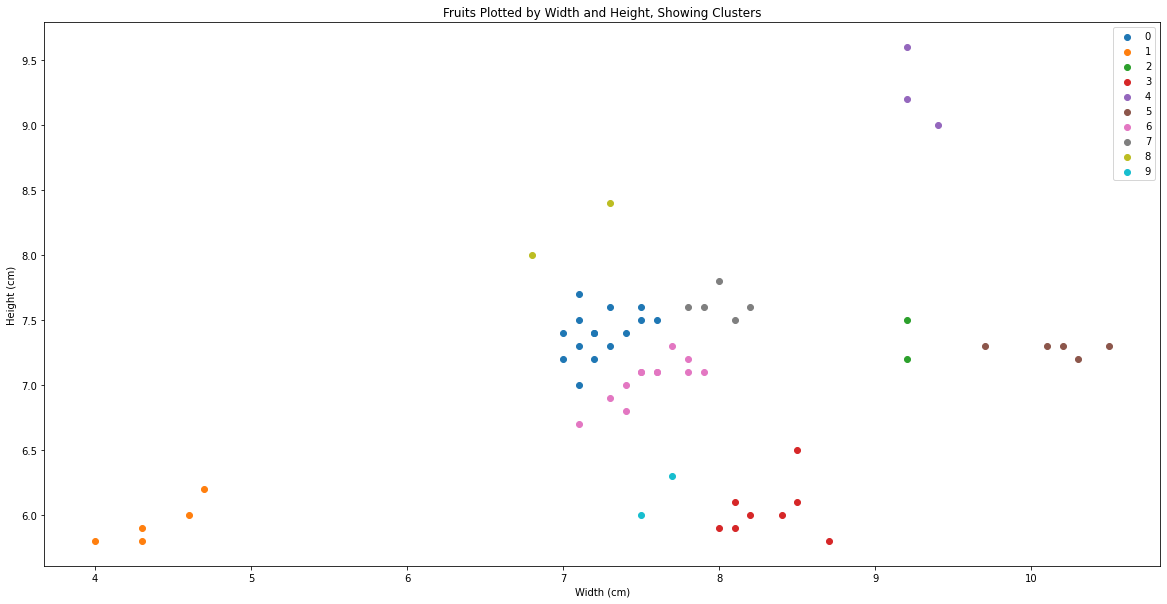

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10).fit(data)
gmm_labels = gmm.predict(data)

u_labels = np.unique(gmm_labels)
 
#plotting the results:
plt.figure(figsize=(20,10)) 
for i in u_labels:
    plt.scatter(data[gmm_labels == i]["width"] , data[gmm_labels == i]["height"], label = i)

plt.title("Fruits Plotted by Width and Height, Showing Clusters")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend()
plt.show()

##### Probabilities

GMM also gives us the probabiliy with which a certain point is in its assigned cluster.

In [ ]:
probs = gmm.predict_proba(data)
print(probs[:20].round(2))

[[0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.   0.   0.99 0.   0.   0.  ]
 [0.01 0.   0.   0.   0.   0.   0.99 0.   0.   0.  ]
 [0.79 0.   0.   0.   0.   0.   0.21 0.   0.   0.  ]
 [0.08 0.   0.   0.   0.   0.   0.92 0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.99 0.   0.   0.   0.   0.   0.   0.01 0.   0.  ]
 [0.97 0.   0.   0.   0.   0.   0.   0.03 0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.  

Point 1 is 100% likely to appear in cluster 5.

Point 3 is 70% likely to appear in cluster 2 and 30% in cluster 5.

## Final Note

I hope this session has shown all of these unsupervised learning methods are based on statistics. There are important concepts such as mean and variance which are used in most algorithms.

Due to the coding libraries and packages available, it is possible to perform complex algorithms without understanding any statistics.

I strongly believe that data and statistics are related, and an understanding of statistics is important for any data science work.